In [ ]:
#NOTE: Except opencv questions, I coded the rest in vs code jupyter notebook for faster execution of codes
#importing modules
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import urllib.request as urllib2
import requests
from bs4 import BeautifulSoup
import csv
import os
from google.colab.patches import cv2_imshow
from google.colab import drive

In [ ]:
#Q1
n = int(input('Enter number of elements: '))
ls = []
for i in range(n):
    ls.append(int(input()))

ls

[1, 2, 3, 4, 5]

In [ ]:
#Q2
def splitToList(s):
    x = s[:s.index(' ')]
    y = s[s.index(' ') + 1:]

    ls = []
    ls.append(int(x))
    ls.append(int(y))

    return ls

st = input('Enter x and y coordinate of given 2D point, separated by space: ')
pt = splitToList(st)

arr = []

n = int(input('Enter number of 2D points in array, n should be greater than 2 :'))

for i in range(n):
    string = input('Enter x and y coordinate, separated by space: ')
    point = splitToList(string)
    arr.append(point)

dist = dict({})

for i in range(n):
    distance = math.sqrt(math.pow(arr[i][0] - pt[0], 2) + math.pow(arr[i][1] - pt[1], 2))

    if distance in dist:
        dist[distance].append(arr[i])
    else:
        dist.update({distance:[arr[i]]})

sorted_dist = dict(sorted(dist.items()))

c=0
for i in sorted_dist:
    print(sorted_dist[i])
    c = c + len(sorted_dist[i])

    if c==3:
        break;




{}
[[1, 1], [3, 3]]
[[4, 7]]


In [ ]:
#Q3
n = int(input('Enter number of words:'))

words = [input() for i in range(n)]

lengths = [len(word) for word in words]

print(words)
print(lengths)


['Rishabh', 'Acharya', 'abcd']
[7, 7, 4]


In [ ]:
#Q4
a = np.array([1,2,3])
b = np.array([4,5,6])

c = a*b
print(c)

[ 4 10 18]


In [ ]:
#Q5
a = np.arange(1,21)
b = a[5:16].copy()
print(b)

[ 6  7  8  9 10 11 12 13 14 15 16]


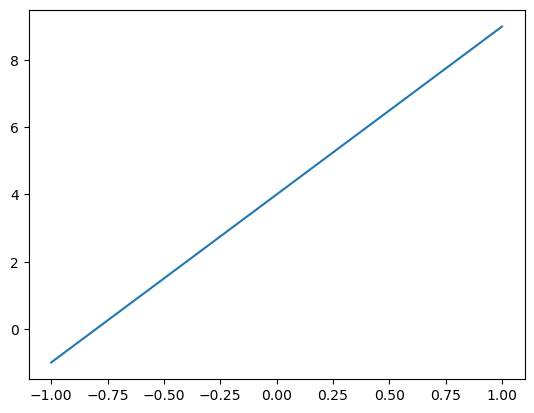

In [ ]:
#Q6a
def f(x):
    return 5*x+4

x_val = np.linspace(-1,1,200)
y_val = f(x_val)

plt.plot(x_val, y_val, label = 'y = 5x + 4')
plt.show()

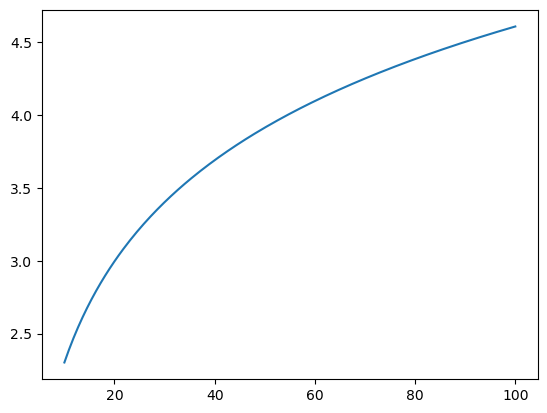

In [ ]:
#Q6b
def f(x):
    return np.log(x)

x_val = np.linspace(10,100,200)
y_val = f(x_val)

plt.plot(x_val, y_val, label = 'y = ln(x)')
plt.show()

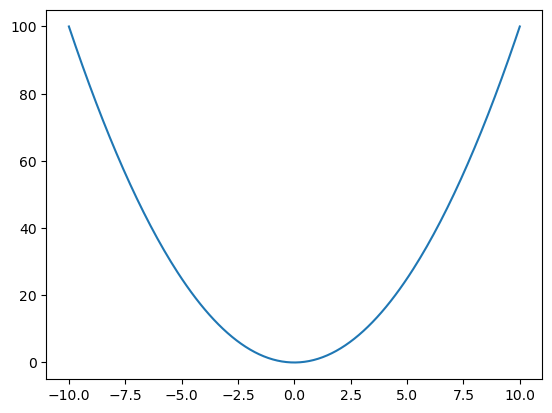

In [ ]:
#Q6c
def f(x):
    return x**2

x_val = np.linspace(-10,10,200)
y_val = f(x_val)

plt.plot(x_val, y_val, label = 'y = x^2')
plt.show()

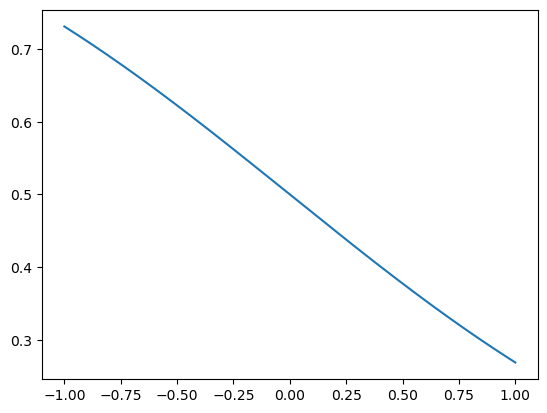

In [ ]:
#Q6d
def f(x):
    return 1/(1+(math.e)**x)

x_val = np.linspace(-1,1,200)
y_val = f(x_val)

plt.plot(x_val, y_val, label = 'y = 1/(1+e^x)')
plt.show()

In [ ]:
#Q7
df = pd.read_csv('https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA1/DATA/feature.csv')

column_names = df.columns
column_names_toInt = [int(item) for item in column_names]

new_row = dict(zip(column_names, column_names_toInt))

df.loc[-1] = new_row
df = df.sort_index().reset_index(drop=True)

new_column_names = ['1', '2', '3', '4', '5']
df.columns = new_column_names

df.fillna(df.mean(), inplace=True)

df

,1,2,3,4,5
0,354.000000,721.0,187.0,602.000000,893.0
1,438.000000,279.0,550.0,146.000000,933.0
2,812.000000,661.0,924.0,460.714286,337.0
3,519.000000,64.0,805.0,454.000000,289.0
4,26.000000,360.0,972.0,621.000000,509.0
...,...,...,...,...,...
88,364.000000,753.0,522.0,741.000000,215.0
89,566.315217,915.0,425.0,939.000000,312.0
90,919.000000,417.0,937.0,79.000000,439.0
91,273.000000,836.0,581.0,239.000000,254.0


In [ ]:
#Q8
url = 'https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA1/DATA/demo.csv'
df = pd.read_csv(url, quoting=3)

df = df.rename(columns={'"Name':'Name','Country"':'Country'})
df['Name'] = df['Name'].apply(lambda x: x[1:])
df['Country'] = df['Country'].apply(lambda x: x[:len(x)-1])

filtered_df = df[(df['Age'] > 40) & (df['Gender'] == 'Female')]
filtered_df

,Name,Age,Gender,Country
0,Priya Patel,45,Female,India
4,Sibongile Zulu,55,Female,Africa
7,Olivia Green,45,Female,USA
19,Adanna Onwuka,47,Female,Africa


In [ ]:
#Q9
url = 'https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA1/DATA/population.csv'
df = pd.read_csv(url, index_col=None)

df['Population'] = df['Population'].apply(lambda x: x.replace(',',''))
df['Population'] = df['Population'].apply(lambda x: int(x))

grouped_df = df.groupby('Country')
for country, group in grouped_df:
    print(f"\nGroup for {country}")
    print(group)

mean_df = grouped_df['Population'].mean()
mean_df = pd.DataFrame({
    'City': mean_df.index,
    'Mean Population': mean_df.values
})
mean_df


Group for Brazil
   Country            City  Population
12  Brazil       Fortaleza     2669342
15  Brazil        Salvador     2886698
16  Brazil        Brasilia     3055149
20  Brazil  Rio de Janeiro     6747815
27  Brazil       Sao Paulo    12325232

Group for China
   Country       City  Population
28   China   Shenzhen    12356820
31   China  Guangzhou    14904400
32   China    Chengdu    16044600
33   China    Beijing    21516000
34   China   Shanghai    24256800

Group for Germany
    Country       City  Population
2   Germany  Frankfurt      753056
4   Germany    Cologne     1085664
6   Germany     Munich     1471508
9   Germany    Hamburg     1899160
18  Germany     Berlin     3769495

Group for India
   Country       City  Population
21   India  Hyderabad     6809970
22   India    Chennai     7088000
24   India  Bangalore     8443675
26   India      Delhi    11034555
29   India     Mumbai    12478447

Group for Japan
   Country      City  Population
8    Japan   Sapporo     18

RangeIndex(start=0, stop=7, step=1)

In [ ]:
#Q10
df = pd.DataFrame({
    'Sales': range(90,100),
    'Expenses': range(30,50,2)
    })

df['Profit'] = df['Sales'] - df['Expenses']
df

,Sales,Expenses,Profit
0,90,30,60
1,91,32,59
2,92,34,58
3,93,36,57
4,94,38,56
5,95,40,55
6,96,42,54
7,97,44,53
8,98,46,52
9,99,48,51


In [ ]:
#Q11
names = ['Arjo', 'Soham', 'Sagnik', 'Suparno', 'Arghodeep', 'Barnik', 'Manish', 'Shriyans', 'Pratyay', 'Dipto']
numbers = ['911234567890',
           '5556789123',
           '912345678900',
           '7890123456',
           '918765432100',
           '1234567890',
           '912345678999',
           '9876543210',
           '912345678987',
           '2345678901']

phonebook = dict(zip(names, numbers))

def phoneBookFilter(pBook):
    return {name: number for name, number in pBook.items() if number[:2] == '91'}

filtered_dict = phoneBookFilter(phonebook)

print(filtered_dict)

{'Arjo': '911234567890', 'Sagnik': '912345678900', 'Arghodeep': '918765432100', 'Manish': '912345678999', 'Pratyay': '912345678987'}


In [ ]:
#Q12
def ReLU(x):
    return [max(0, i) for i in x]

def sigmoid(x):
    return [(1 / (1 + math.exp(-i))) for i in x]

n = int(input('Enter number of elements in vector: '))
vector = [float(input(f"Element {i+1}")) for i in range(n)]

print(f"{vector}\n")
print(f"ReLU : {ReLU(vector)}\nSigmoid : {sigmoid(vector)}")



[-1.0, 2.0, 4.0, 10.0, -10.0]

ReLU : [0, 2.0, 4.0, 10.0, 0]
Sigmoid : [0.2689414213699951, 0.8807970779778823, 0.9820137900379085, 0.9999546021312976, 4.5397868702434395e-05]


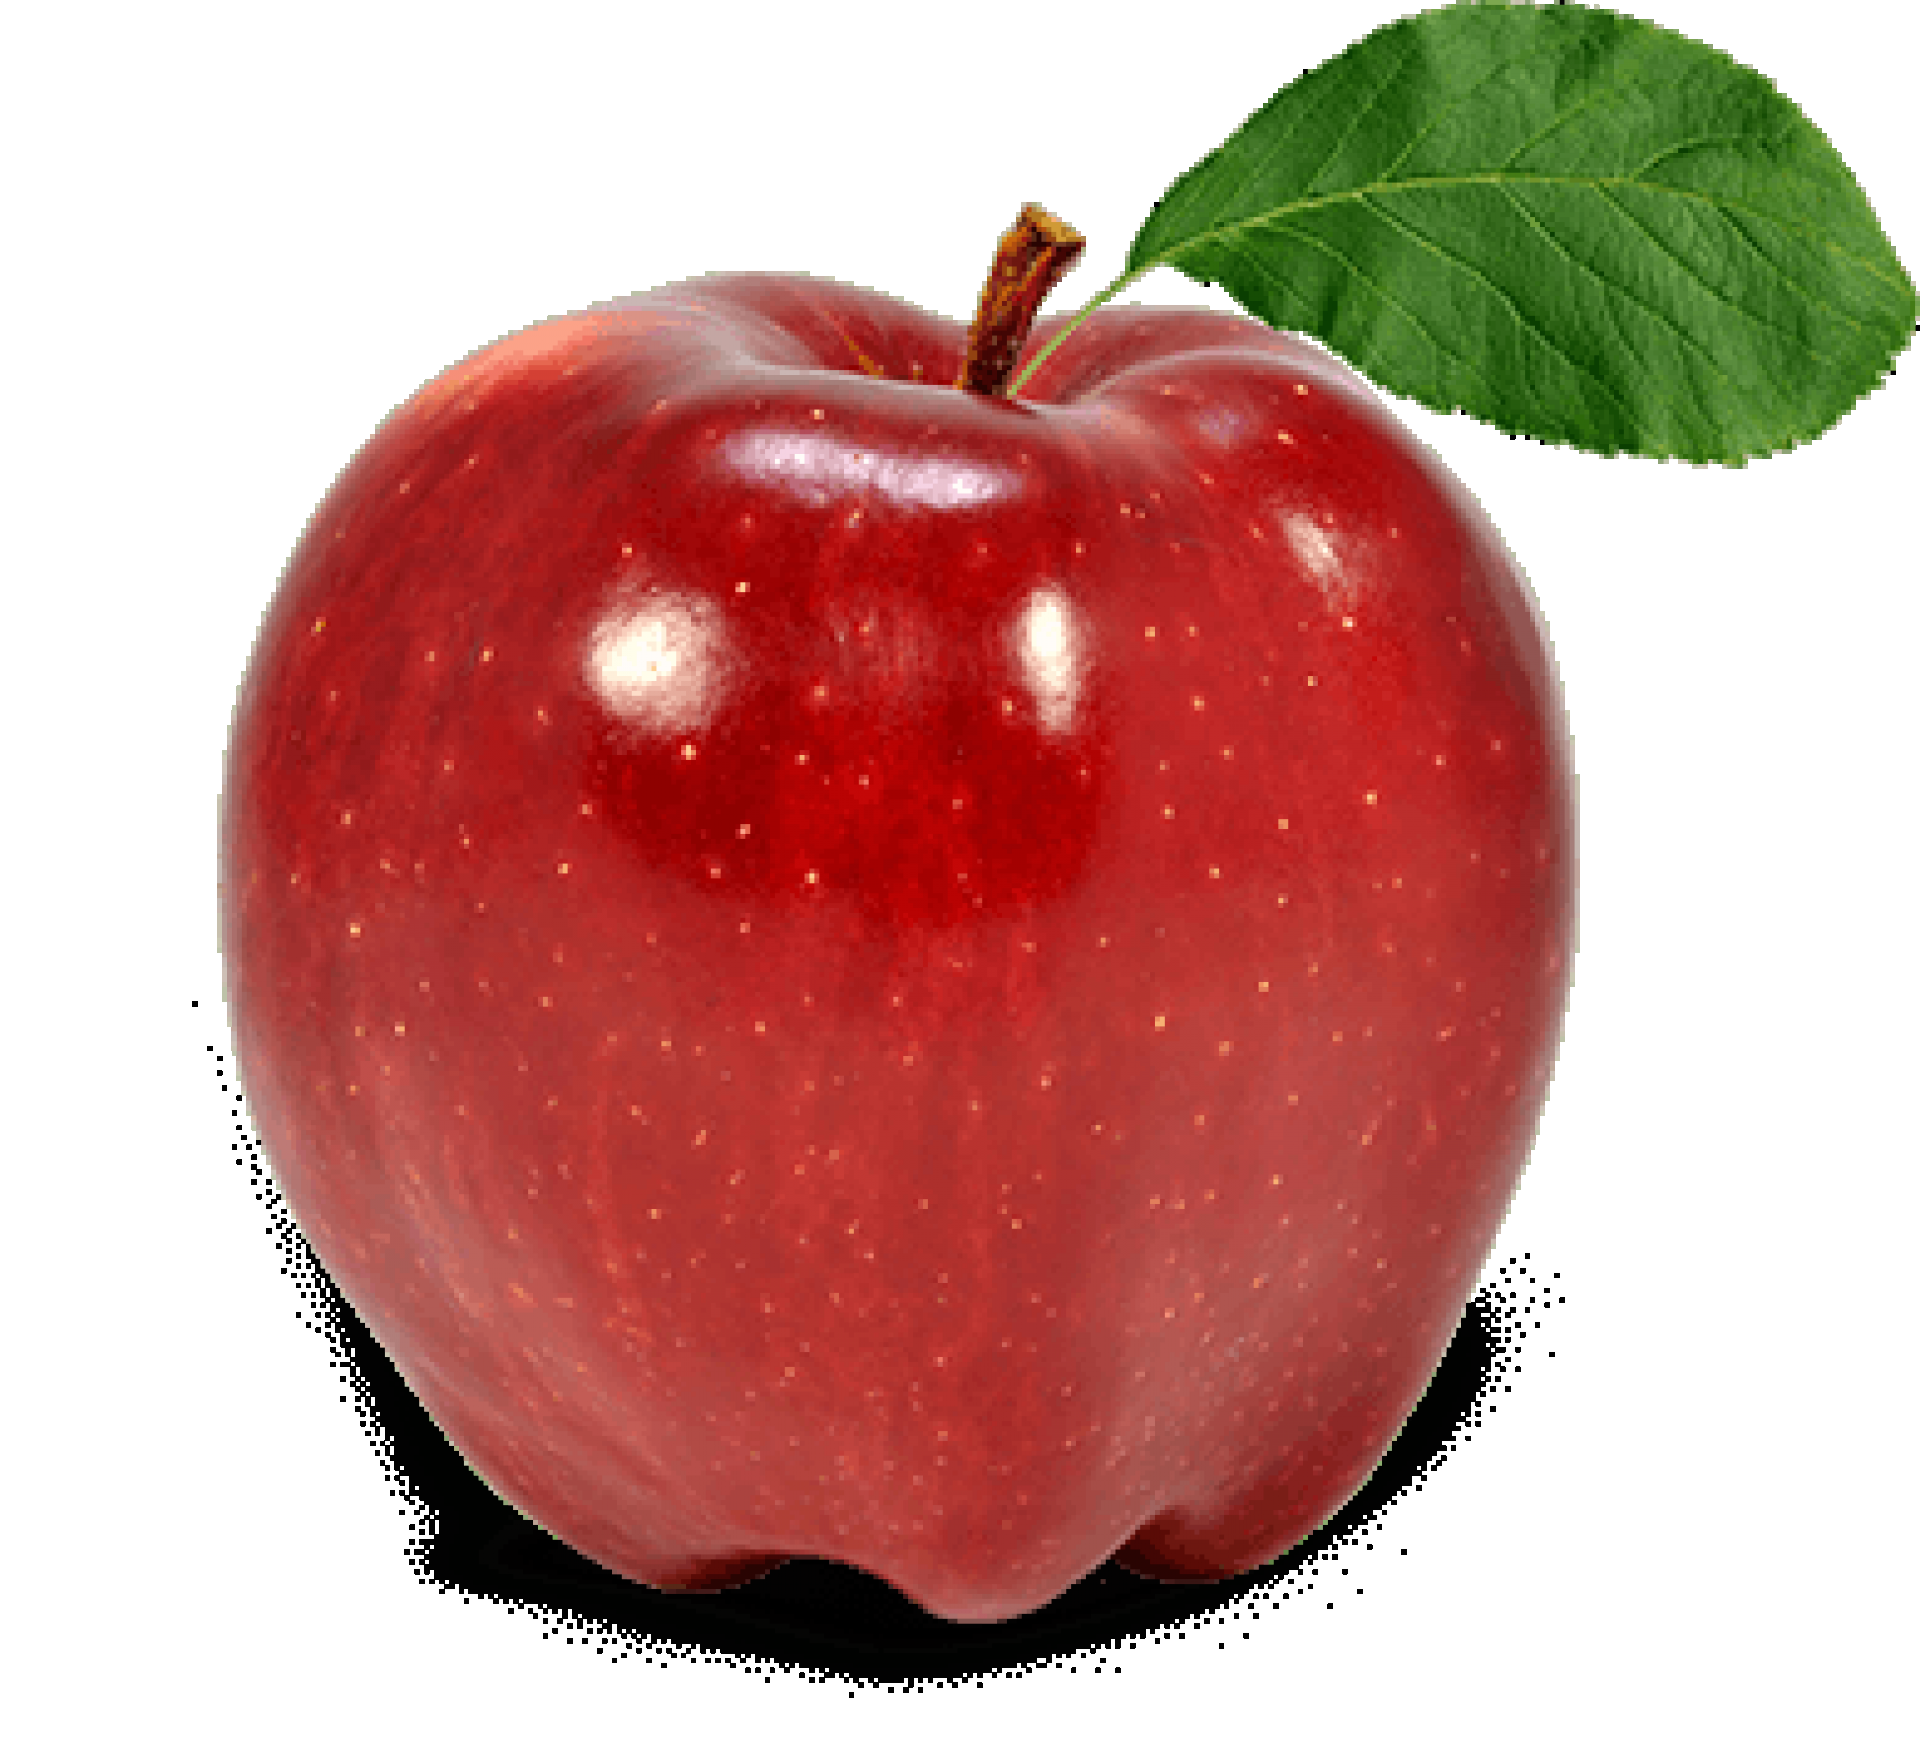

Average redness : 198.1216519142199


In [ ]:
#Q13
image_url = "https://drive.google.com/uc?id=1WmPLsPhk365T2V7s-r4BZ41nRxNS3h3p"
local_path = "/content/apple.jpg"

urllib2.urlretrieve(image_url, local_path)

def average_redness(image):
    _, _, red = cv2.split(image)
    average_redness = np.mean(red)

    return average_redness

image = cv2.imread(local_path)

if image is not None:
  cv2_imshow(image)

avg_redness = average_redness(image)
print(f'Average redness : {avg_redness}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


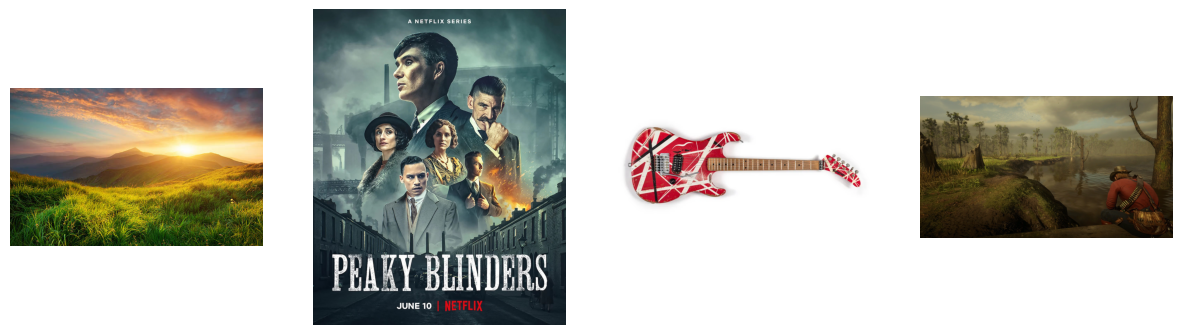

Image Files:
/content/drive/MyDrive/PA1_folder_Q14/scenery.jpg
/content/drive/MyDrive/PA1_folder_Q14/peakyblinders.jpg
/content/drive/MyDrive/PA1_folder_Q14/subfolder/vanhalenguitar.jpeg
/content/drive/MyDrive/PA1_folder_Q14/subfolder/rdr2.png


In [ ]:
#Q14
#IMPORTANT: Please note that I have got access to the folder by mounting my own drive. So this block of code will probably not execute in other devices.
#However, I hope that the output is visible

def display_images(folder_path):

    image_extensions = ['.png', '.jpeg', '.jpg', '.tiff']
    file_paths = []
    images = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            _, file_extension = os.path.splitext(file_path)
            if file_extension.lower() in image_extensions:
                file_paths.append(file_path)


            if file_extension.lower() in image_extensions:
                try:
                    img = cv2.imread(file_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img_rgb)
                except Exception as e:
                    print(f"Error reading image file {file_path}: {e}")

    rows = (len(images) // 4) + 1
    cols = min(len(images), 4)

    plt.figure(figsize=(15, 5 * rows))

    for i, image in enumerate(images, 1):
        plt.subplot(rows, cols, i)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

    return file_paths

folder_path = '/content/drive/MyDrive/PA1_folder_Q14'
file_paths = display_images(folder_path)

print("Image Files:")
for file in file_paths:
    print(file)

In [ ]:
#Q15
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2*(self.width + self.height)

w = float(input('Enter width: '))
h = float(input('Enter height: '))
rect = Rectangle(width= w, height= h)

area = rect.area()
perimeter = rect.perimeter()

print(f"Area: {area}\nPerimeter: {perimeter}")

Area: 50.0
Perimeter: 30.0


[84.592, 81.184, 85.536, 63.136, 84.616]
[243.53380645161292, 264.1029677419355, 276.70232258064544, 449.07006451612887, 164.69006451612896]
[0 1 2 3 4]


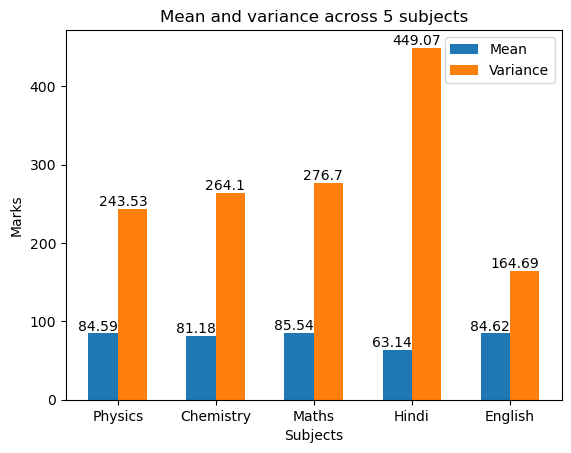

In [ ]:
#Q16
df = pd.read_csv('https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA1/DATA/marks.csv')

df

cols = ['Physics', 'Chemistry', 'Maths', 'Hindi', 'English']
mean = []
variance = []

for cname in cols:
    mean.append(df[cname].mean())
    variance.append(df[cname].var())

print(mean)
print(variance)

data = {'Mean': mean, 'Variance': variance}


bar_width = 0.3

x_pos_mean = np.arange(len(cols))
x_pos_var = x_pos_mean + bar_width

plt.bar(x_pos_mean, mean, width=bar_width, label='Mean')
plt.bar(x_pos_var, variance, width=bar_width, label='Variance')

for i, value in enumerate(mean):
    plt.text(x_pos_mean[i] + bar_width / 2, value + 0.1, str(round(value, 2)), ha='right', va='bottom')

for i, value in enumerate(variance):
    plt.text(x_pos_var[i] + bar_width / 2, value + 0.1, str(round(value, 2)), ha='right', va='bottom')

plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.title('Mean and variance across 5 subjects')
plt.xticks(x_pos_mean + bar_width / 2, cols)
plt.legend()

plt.show()

In [ ]:
#Q17
def write_to_csv(authors, titles, pdf_links, output_file='iccv2023_papers.csv'):
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Author', 'Title', 'PDF Link'])


        for data in zip(authors, titles, pdf_links):
            writer.writerow(data)

url = 'https://openaccess.thecvf.com/ICCV2023?day=all'
page = urllib2.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

papers = soup.select('.ptitle')
#print(papers)

authors_forms = soup.select('.authsearch')
#print(authors_forms)
titles_list = []
authors_list = []
final_authors_list = []
curr_topic_authors = []
pdf_links = []

curr_topic = ''
prev_topic = ''
for form in authors_forms:
    dt_element = form.find_previous('dt', class_='ptitle')
    curr_topic = dt_element.text.strip()

    if((prev_topic != curr_topic) and (prev_topic != '')):
        titles_list.append(prev_topic)
        authors_list.append(curr_topic_authors)
        curr_topic_authors = []

    curr_topic_authors.append(form.a.text.strip())

    # if(prev_topic != curr_topic):
    #     curr_topic_authors = []

    prev_topic = curr_topic

titles_list.append(curr_topic)
authors_list.append(curr_topic_authors)

for paper in papers:
    pdf_link = f"https://openaccess.thecvf.com{paper.a['href']}"
    pdf_links.append(pdf_link)



for author_list in authors_list:
    names = ''
    for i in range(len(author_list)):
        if i != (len(author_list) - 1):
            names = names + author_list[i] + ', '
        else:
            names = names + author_list[i]

    final_authors_list.append(names)


write_to_csv(final_authors_list, titles_list, pdf_links, output_file='iccv2023_papers.csv')

df = pd.read_csv('iccv2023_papers.csv')
df

,Author,Title,PDF Link
0,"Sungwon Han, Sungwon Park, Fangzhao Wu, Sundon...",Towards Attack-tolerant Federated Learning via...,https://openaccess.thecvf.com/content/ICCV2023...
1,"Lukas Zbinden, Lars Doorenbos, Theodoros Pissa...",Stochastic Segmentation with Conditional Categ...,https://openaccess.thecvf.com/content/ICCV2023...
2,"Xunpeng Yi, Han Xu, Hao Zhang, Linfeng Tang, J...",Diff-Retinex: Rethinking Low-light Image Enhan...,https://openaccess.thecvf.com/content/ICCV2023...
3,"Rui Liu, Xiaohan Wang, Wenguan Wang, Yi Yang",Bird's-Eye-View Scene Graph for Vision-Languag...,https://openaccess.thecvf.com/content/ICCV2023...
4,"Bowen Li, Ziyuan Huang, Junjie Ye, Yiming Li, ...",PVT++: A Simple End-to-End Latency-Aware Visua...,https://openaccess.thecvf.com/content/ICCV2023...
...,...,...,...
2151,"Chan Hee Song, Jiaman Wu, Clayton Washington, ...",LLM-Planner: Few-Shot Grounded Planning for Em...,https://openaccess.thecvf.com/content/ICCV2023...
2152,"Xiaotong Li, Zixuan Hu, Yixiao Ge, Ying Shan, ...",Exploring Model Transferability through the Le...,https://openaccess.thecvf.com/content/ICCV2023...
2153,"Thomas E. Huang, Yifan Liu, Luc Van Gool, Fish...",Video Task Decathlon: Unifying Image and Video...,https://openaccess.thecvf.com/content/ICCV2023...
2154,"Xiaqing Pan, Nicholas Charron, Yongqian Yang, ...",Aria Digital Twin: A New Benchmark Dataset for...,https://openaccess.thecvf.com/content/ICCV2023...
